# Keras binary and multiclass classification examples

This is an example of using neural networks to solve a classification problem:

* Binary classification: Heart disease dataset
* Multiclass classification: wine dataset 
    
The first example is a simple model approach while the second example would commit a further analysis with learning rate, batch_size and optimizer evaluation for the best model tunning.

## Binary classification: Heart Disease

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv('E:\\Datasets\\heart.csv')

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### EDA & Data wrangling

In [58]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [234]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


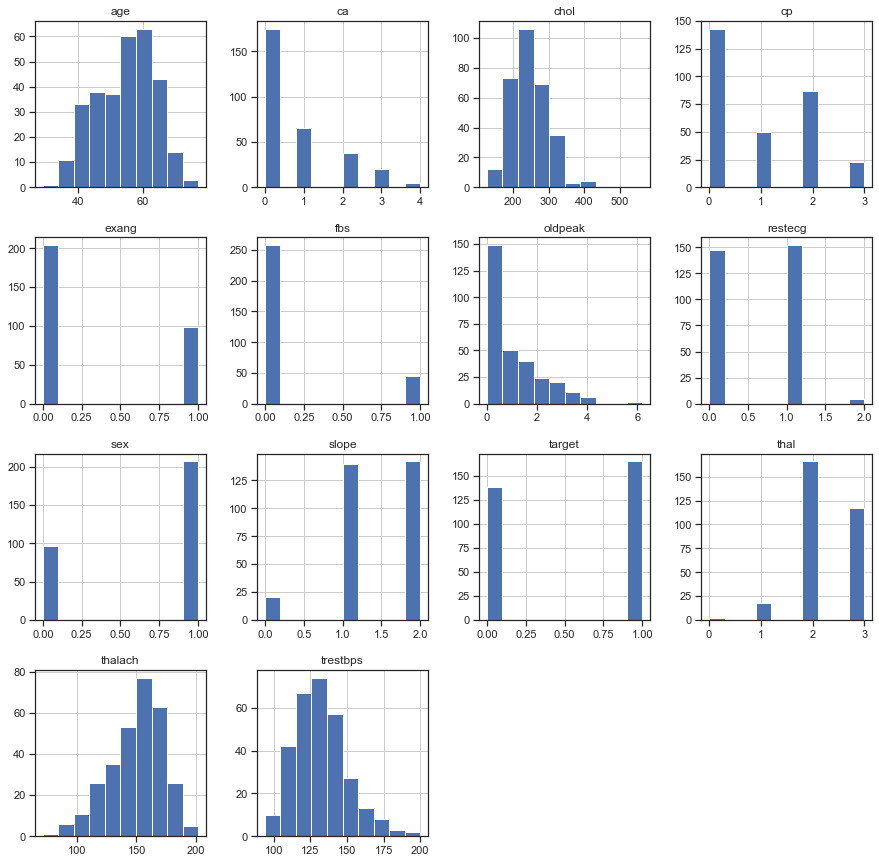

In [221]:
_ = df.hist(figsize=(15,15))

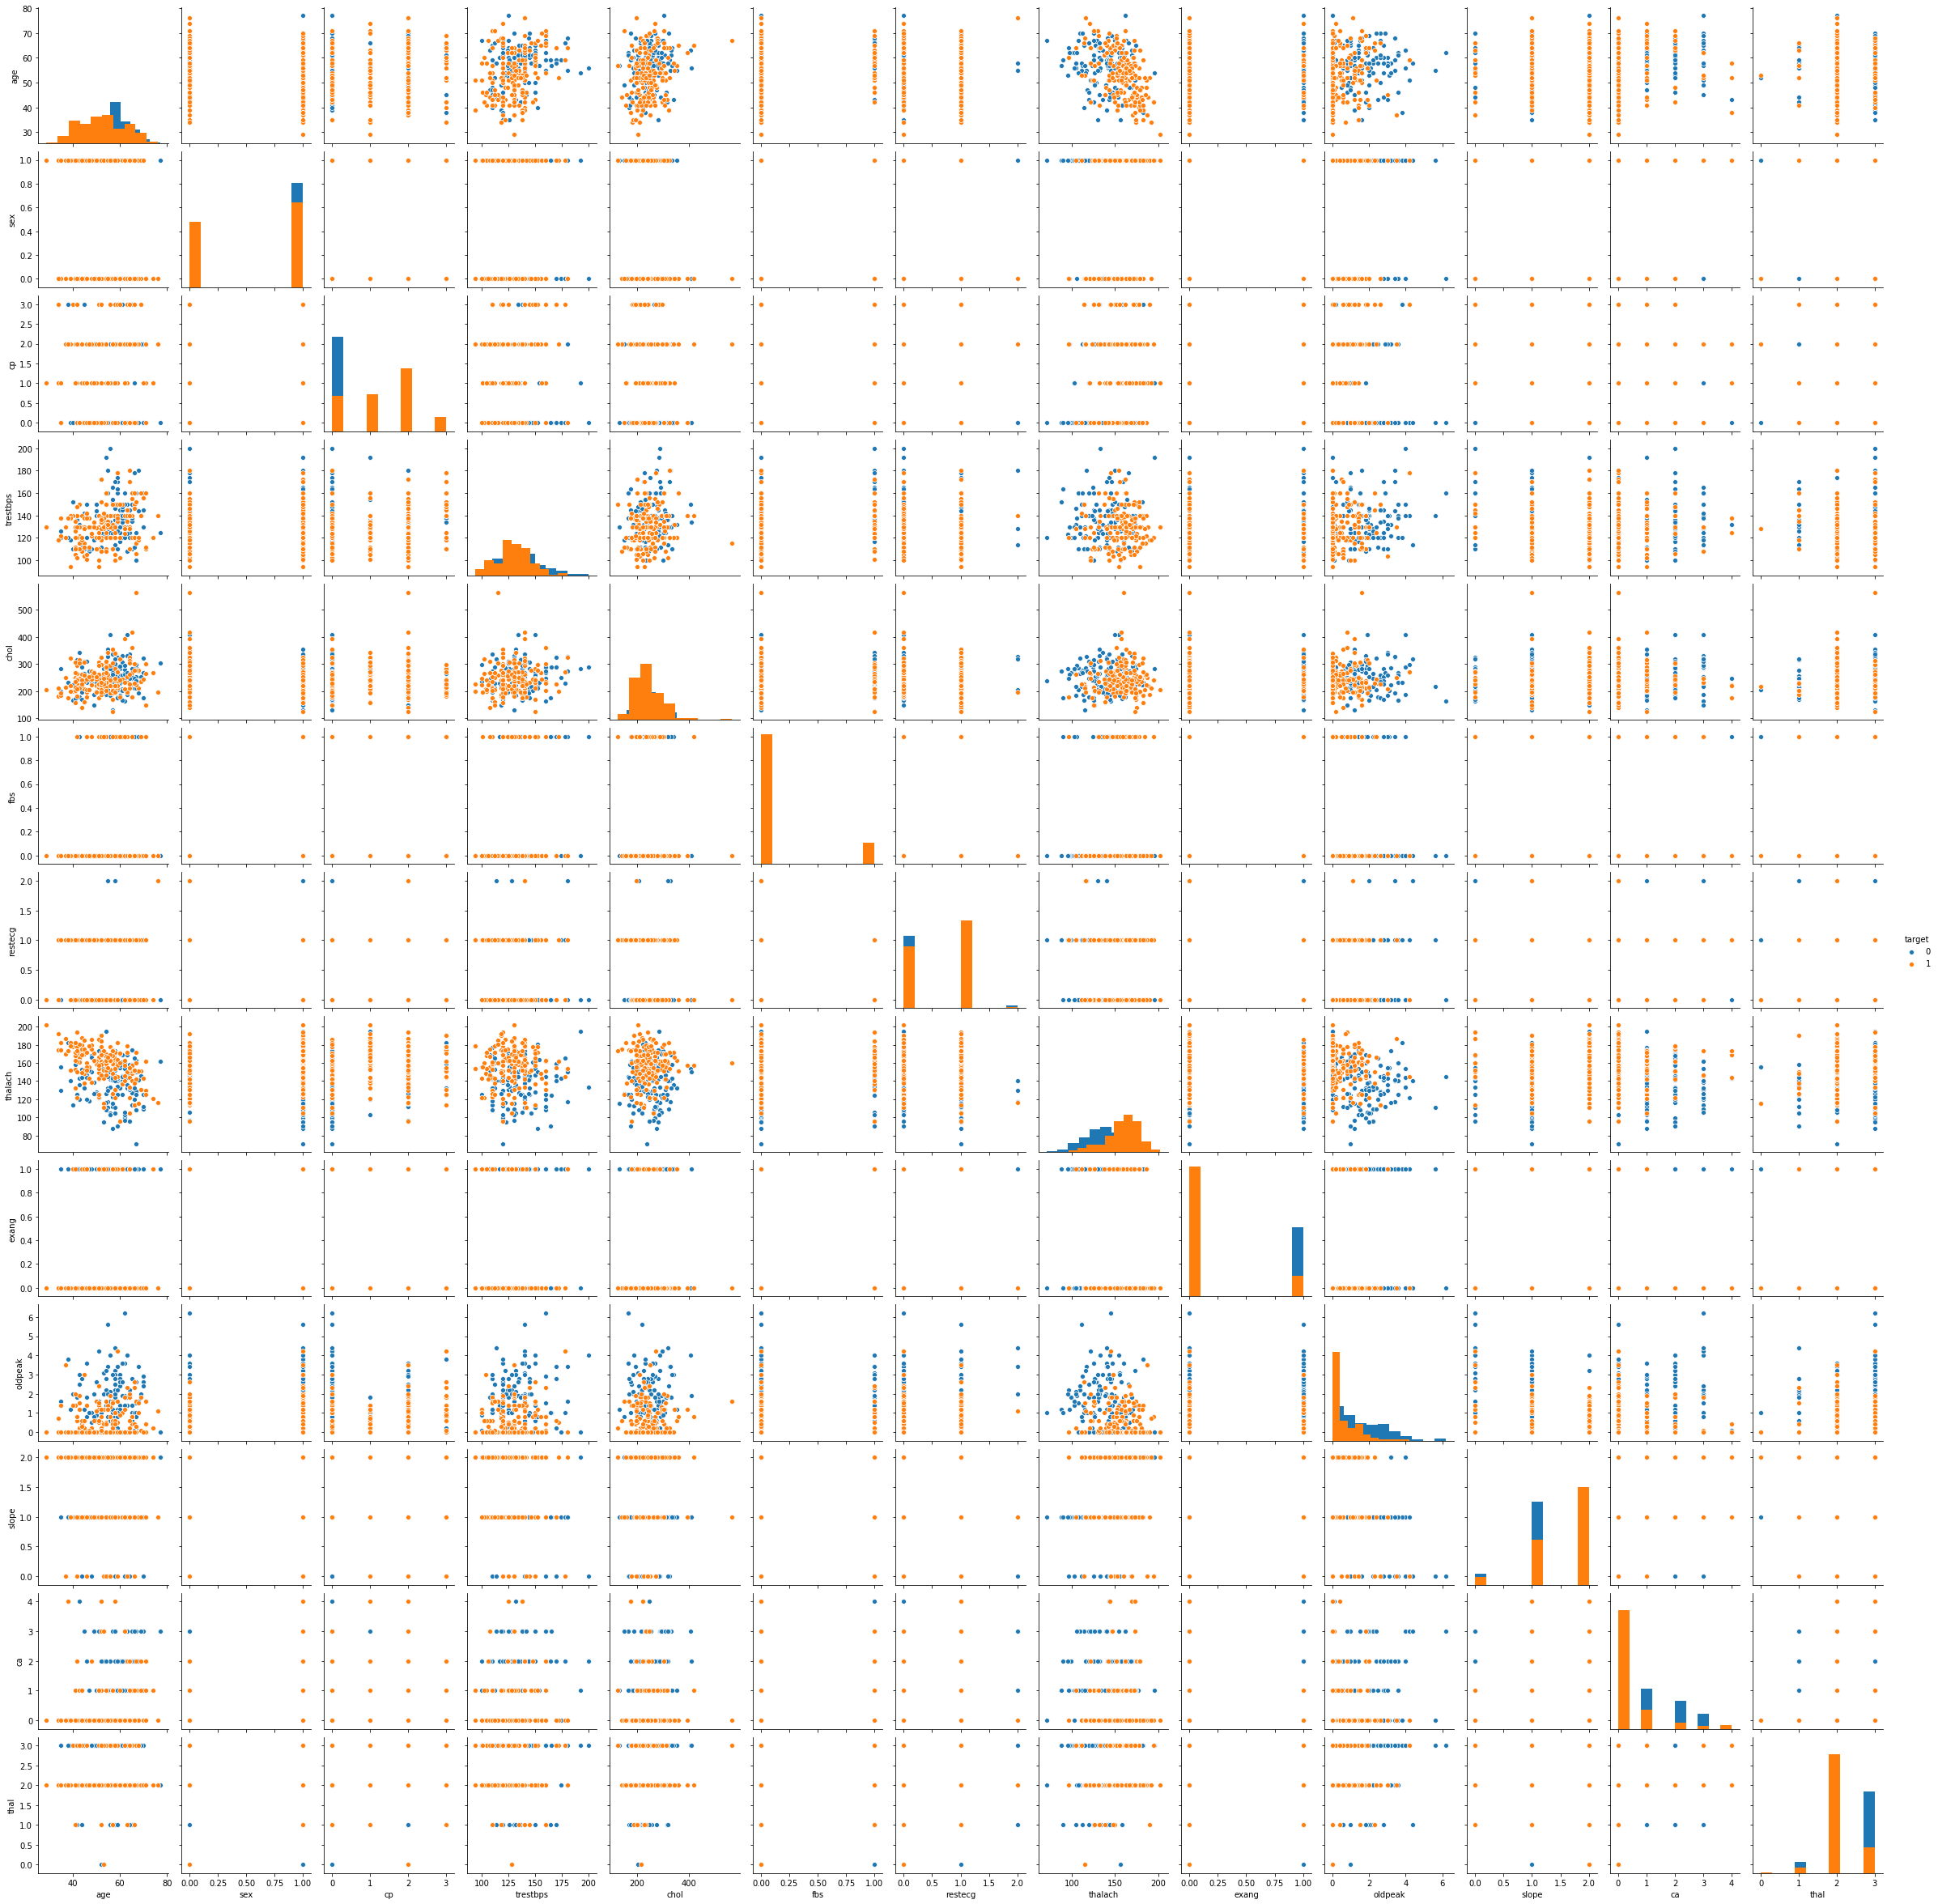

In [17]:
sns.pairplot(df,hue='target', diag_kind = 'hist')

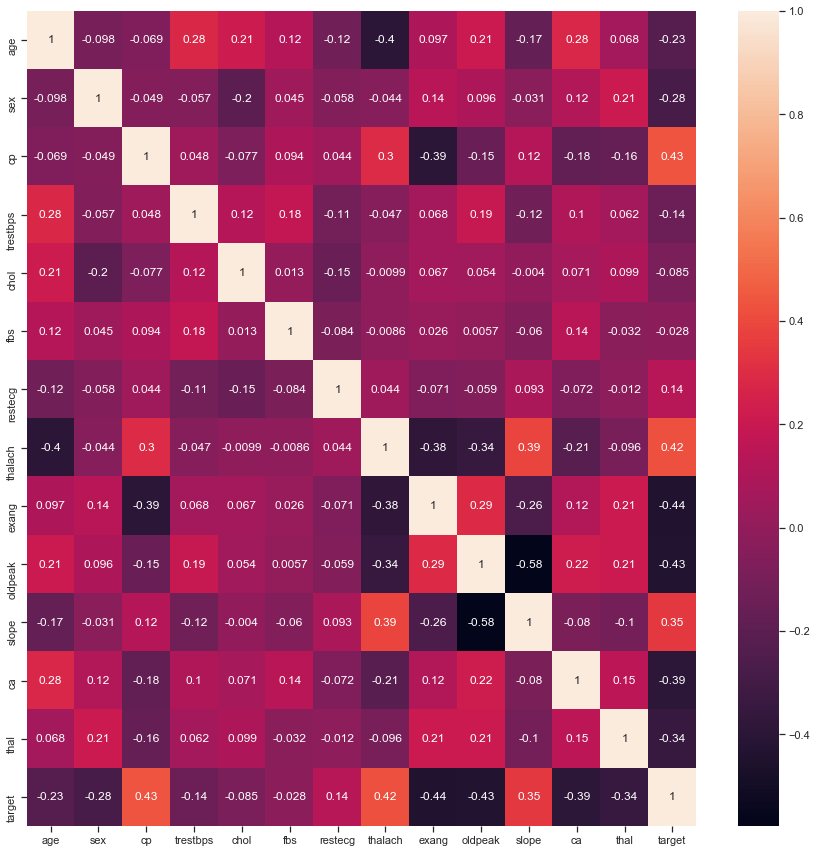

In [224]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, ax=ax)

Text(0.5, 0, 'target')

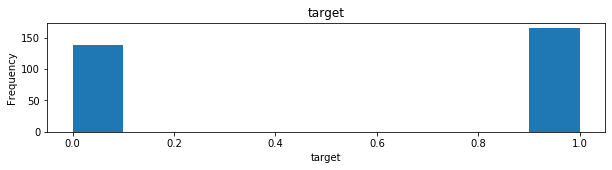

In [61]:
feature = 'target'
plt.figure(figsize=(10,2))
df[feature].plot(kind='hist', title=feature)
plt.xlabel(feature)

In [62]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Missings

In [63]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Classification

#### Normalize data

In [64]:
from sklearn import preprocessing
X = preprocessing.normalize(df.drop(['target'], axis=1))
y = df['target'].values

In [65]:
X

array([[0.19745405, 0.00313419, 0.00940257, ..., 0.        , 0.        ,
        0.00313419],
       [0.10874818, 0.00293914, 0.00587828, ..., 0.        , 0.        ,
        0.00587828],
       [0.1368249 , 0.        , 0.00333719, ..., 0.00667439, 0.        ,
        0.00667439],
       ...,
       [0.23671899, 0.00348116, 0.        , ..., 0.00348116, 0.00696232,
        0.01044348],
       [0.25352009, 0.00444772, 0.        , ..., 0.00444772, 0.00444772,
        0.01334316],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00306962,
        0.00613925]])

In [66]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
y.shape

(303,)

#### Preparing target labels for keras model

In [68]:
from keras.utils import to_categorical
y_cat = to_categorical(y)

In [69]:
print(y_cat.shape)

(303, 2)


In [70]:
y_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

#### Model

In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

n_features = len(df.columns)-1
model = Sequential()
#Dense: number of labels/classes, activation funct: softmax for multi-classf, sigmoid for binary classf.
#input_shape(n_features,) or input_dim=n_features)
model.add(Dense(2, input_shape=(n_features,), activation = 'sigmoid'))  
#Loss optimizer: Adam, SGD, loss funct= categorical_crossentropy for multi-class, binary_crossentropy for binary class.
model.compile(Adam(lr=1), loss='binary_crossentropy', metrics = ['accuracy'])

In [171]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 2)                 28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


#### Train and Test split

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size = 0.2)

In [173]:
len(X_train)

242

In [174]:
y_train.shape

(242, 2)

#### Train model

In [175]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8568 - accuracy: 0.4607 - val_loss: 0.7504 - val_accuracy: 0.4098
Epoch 2/100
242/242 [==============================] - 0s 45us/step - loss: 0.6682 - accuracy: 0.5826 - val_loss: 0.6291 - val_accuracy: 0.7213
Epoch 3/100
242/242 [==============================] - 0s 50us/step - loss: 0.6372 - accuracy: 0.6488 - val_loss: 0.6050 - val_accuracy: 0.7377
Epoch 4/100
242/242 [==============================] - 0s 50us/step - loss: 0.6391 - accuracy: 0.6219 - val_loss: 0.6799 - val_accuracy: 0.5328
Epoch 5/100
242/242 [==============================] - 0s 54us/step - loss: 0.6436 - accuracy: 0.6302 - val_loss: 0.7413 - val_accuracy: 0.4672
Epoch 6/100
242/242 [==============================] - 0s 45us/step - loss: 0.6151 - accuracy: 0.6198 - val_loss: 0.5738 - val_accuracy: 0.6639
Epoch 7/100
242/242 [==============================] - 0s 41us/step - loss: 0.5616 - accurac

In [176]:
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

from sklearn.metrics import classification_report
y_test_pred= (y_test_pred> 0.5) 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        25
           1       0.80      0.97      0.88        36

   micro avg       0.84      0.84      0.84        61
   macro avg       0.87      0.81      0.82        61
weighted avg       0.86      0.84      0.83        61
 samples avg       0.84      0.84      0.84        61



## Multi-class classification: wines

In [18]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [19]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### EDA & Data wrangling

In [9]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [10]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


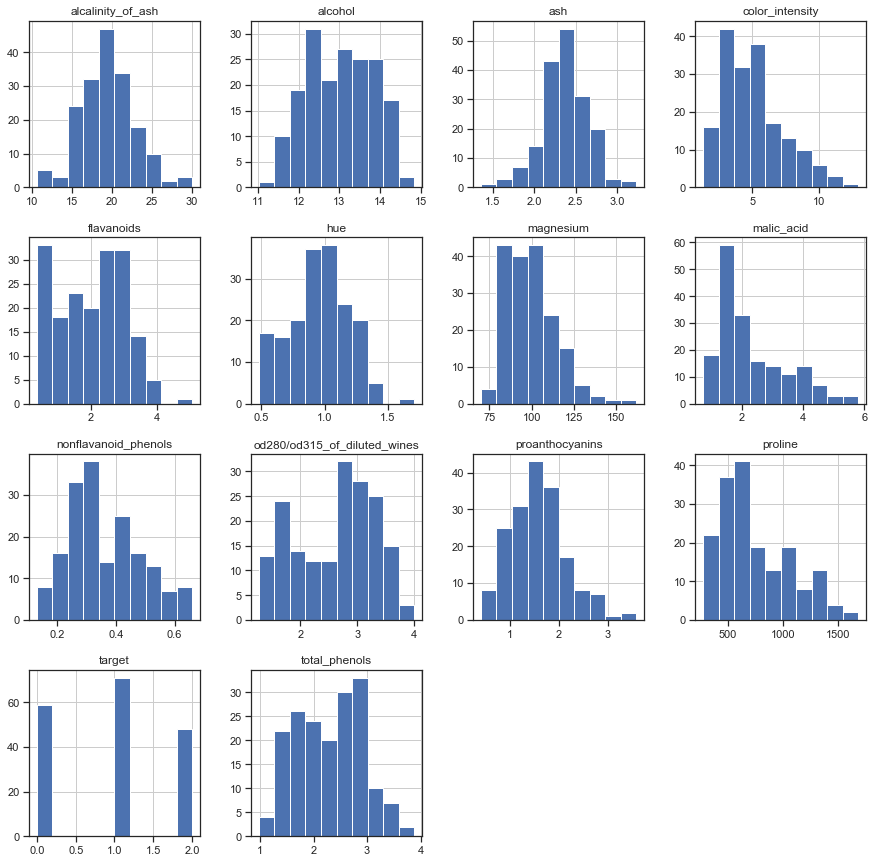

In [229]:
_ = df.hist(figsize=(15,15))

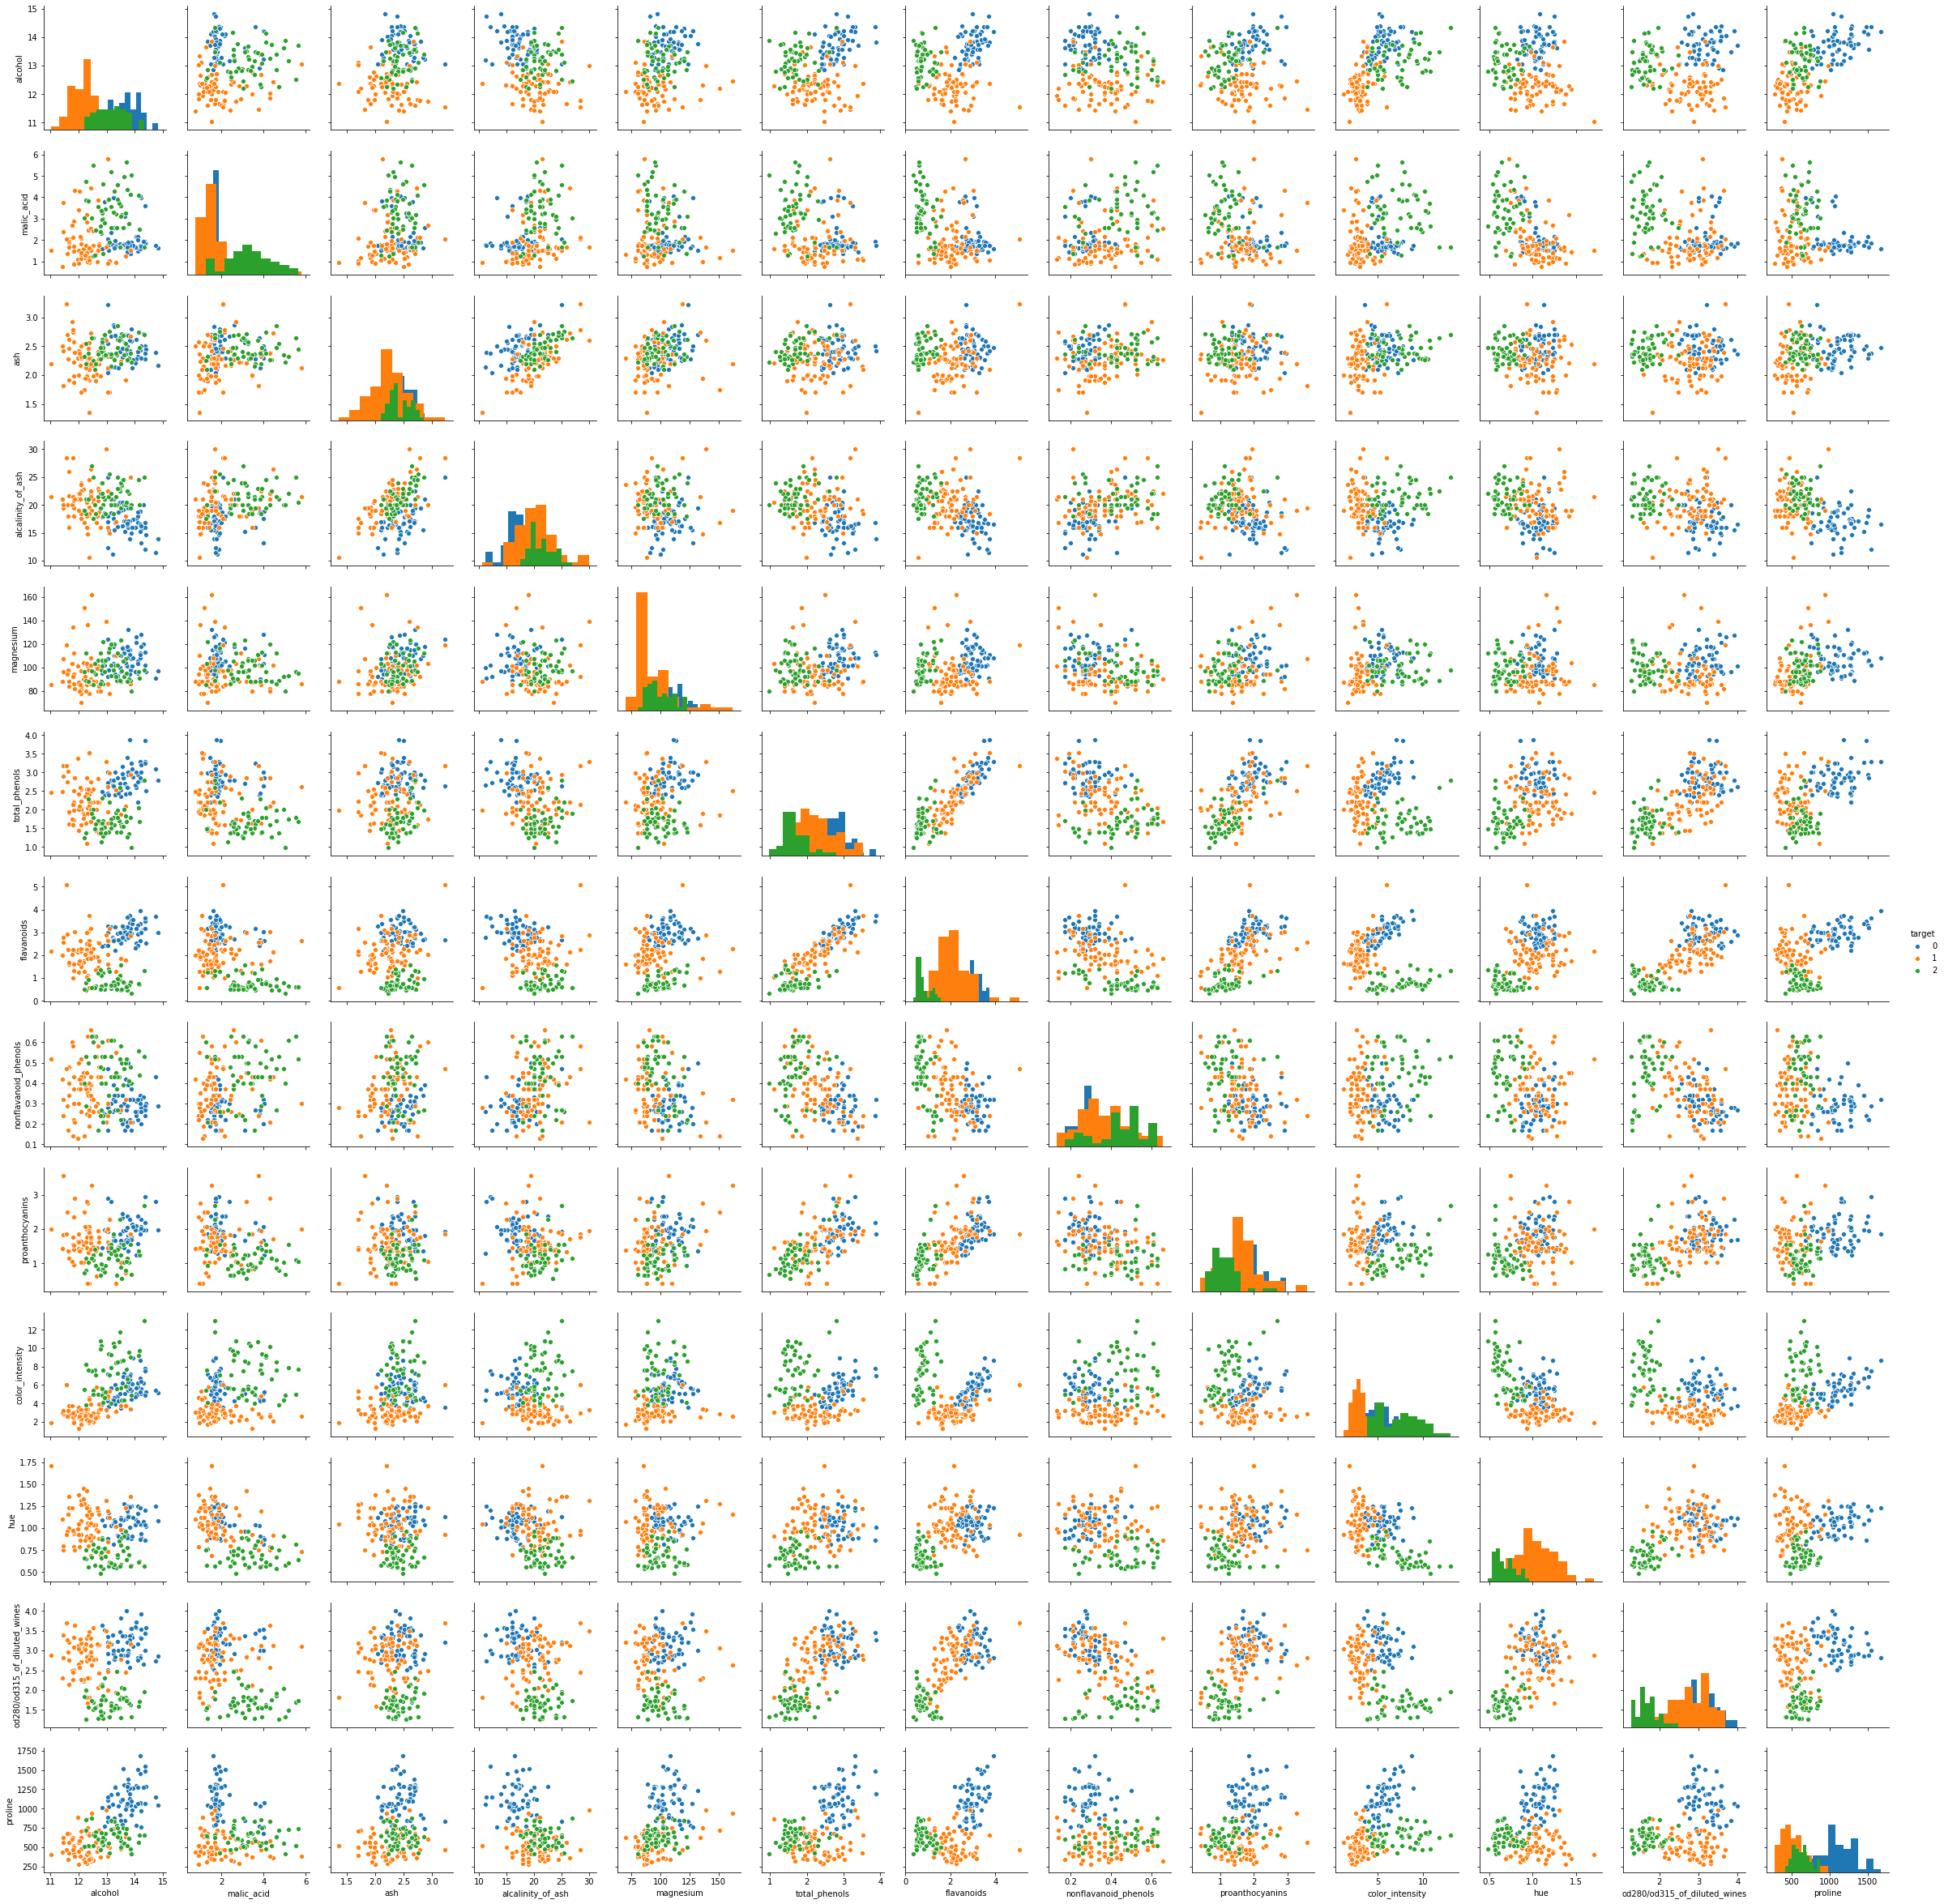

In [13]:
sns.pairplot(df,hue='target', diag_kind = 'hist')

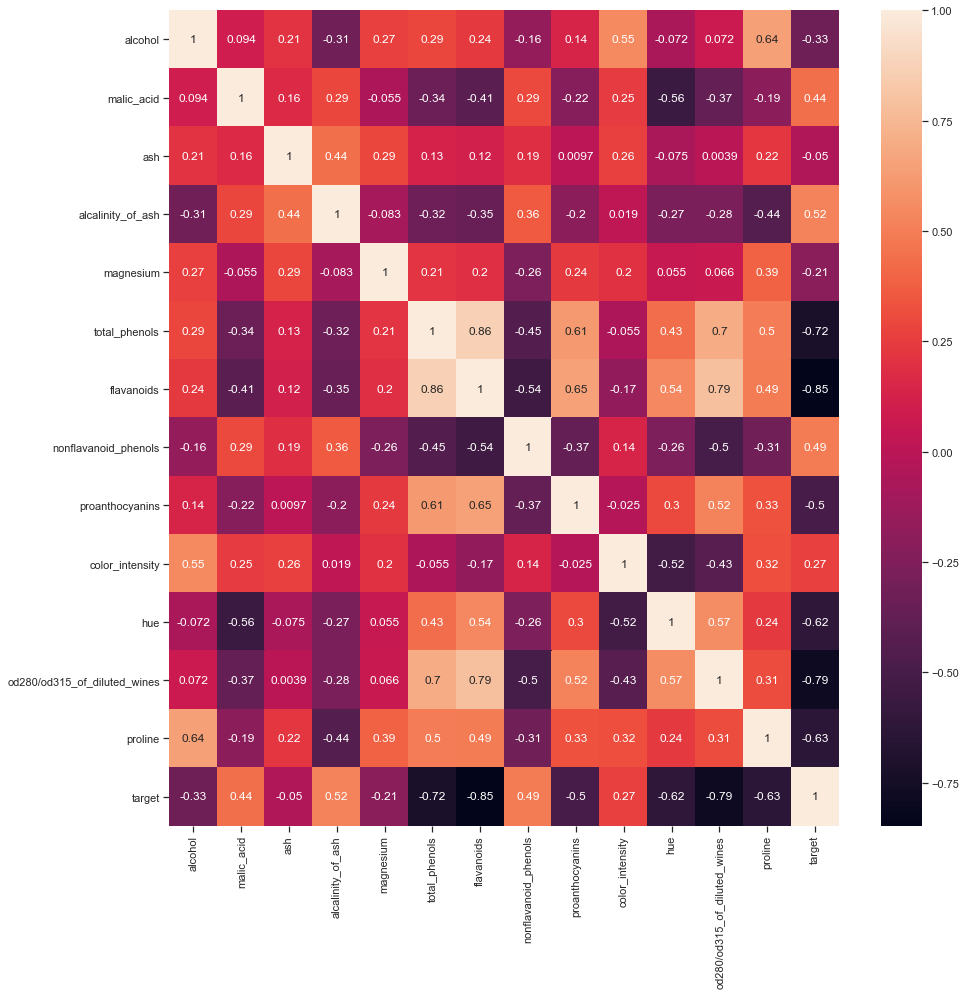

In [230]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, ax=ax)

Text(0.5, 0, 'target')

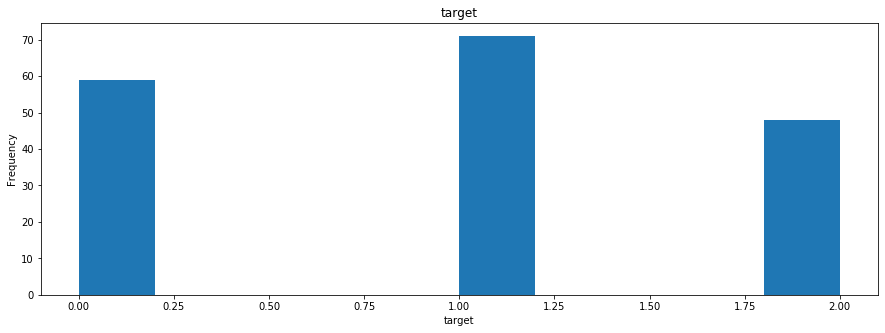

In [181]:
feature = 'target'
plt.figure(figsize=(15,5))
df[feature].plot(kind='hist', title=feature)
plt.xlabel(feature)

In [182]:
df['target'].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

In [20]:
df['target'] = df['target'].astype(int)

### Missings

In [21]:
df.isna().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

### Classification

#### Normalize data

In [22]:
from sklearn import preprocessing
X = preprocessing.normalize(df.drop(['target'], axis=1))
y = df['target'].values

In [25]:
y.shape

(178,)

#### Preparing target labels for keras model

In [29]:
from keras.utils import to_categorical
y_cat = to_categorical(y)

In [27]:
print(y_cat.shape)

(178, 3)


#### Model

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
K.clear_session()
n_features = len(df.columns)-1
model = Sequential()
model.add(Dense(3, input_shape=(n_features,), activation = 'softmax'))  
model.compile(Adam(lr=0.05), loss='categorical_crossentropy', metrics = ['accuracy'])

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Train and Test split

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y_cat,test_size = 0.2)

In [127]:
y_train.shape

(142, 3)

#### Train model

In [128]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=1)

Train on 142 samples, validate on 36 samples
Epoch 1/20
142/142 [==============================] - 0s 683us/step - loss: 1.1004 - accuracy: 0.4014 - val_loss: 1.1047 - val_accuracy: 0.3889
Epoch 2/20
142/142 [==============================] - 0s 42us/step - loss: 1.0772 - accuracy: 0.4014 - val_loss: 1.1000 - val_accuracy: 0.3889
Epoch 3/20
142/142 [==============================] - 0s 42us/step - loss: 1.0732 - accuracy: 0.4789 - val_loss: 1.0976 - val_accuracy: 0.3611
Epoch 4/20
142/142 [==============================] - 0s 49us/step - loss: 1.0586 - accuracy: 0.5915 - val_loss: 1.0792 - val_accuracy: 0.3889
Epoch 5/20
142/142 [==============================] - 0s 39us/step - loss: 1.0457 - accuracy: 0.4014 - val_loss: 1.0649 - val_accuracy: 0.3889
Epoch 6/20
142/142 [==============================] - 0s 56us/step - loss: 1.0366 - accuracy: 0.4014 - val_loss: 1.0576 - val_accuracy: 0.3889
Epoch 7/20
142/142 [==============================] - 0s 49us/step - loss: 1.0251 - accuracy: 0.

In [129]:
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

from sklearn.metrics import classification_report
y_test_pred= (y_test_pred> 0.5) 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.67      0.14      0.24        14
           2       0.00      0.00      0.00        12

   micro avg       0.67      0.06      0.10        36
   macro avg       0.22      0.05      0.08        36
weighted avg       0.26      0.06      0.09        36
 samples avg       0.06      0.06      0.06        36



It's clear that this model it's not good. So let's find  its best hyperparameters for the best accurate predictions.

### Keras model tunning

#### Learning rate optimization

In [156]:
import keras.backend as K

learning_rates = [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3]

df_lr = []

for lr in learning_rates:
    
    K.clear_session()
   
    model = Sequential()
    model.add(Dense(3, input_shape=(n_features,), activation = 'softmax'))  
    model.compile(Adam(lr=lr), loss='categorical_crossentropy', metrics = ['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose = 0, epochs=20)
    df_lr.append(pd.DataFrame(h.history, index = h.epoch))

In [157]:
historydf = pd.concat(df_lr, axis = 1)

In [158]:
historydf.head()

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,1.145551,0.345070,1.129373,0.323944,1.071469,0.436620,1.227602,0.373239,1.597814,0.323944,2.313402,0.387324,2.269897,0.330986,2.606160,0.366197,3.349235,0.401408
1,1.106372,0.345070,1.066522,0.401408,1.051825,0.457746,0.973962,0.492958,1.303169,0.330986,1.345660,0.478873,0.988598,0.577465,1.515989,0.415493,1.753258,0.471831
2,1.083845,0.408451,1.056730,0.415493,1.019463,0.640845,0.863194,0.683099,0.938736,0.514085,1.121398,0.457746,0.911315,0.605634,0.927652,0.647887,1.423719,0.514085
3,1.071833,0.464789,1.037713,0.422535,0.971725,0.661972,0.787597,0.654930,0.941153,0.535211,0.968208,0.577465,0.687723,0.669014,0.582351,0.746479,1.113670,0.654930
4,1.066527,0.401408,1.020775,0.521127,0.967499,0.626761,0.765632,0.704225,0.754503,0.598592,0.700481,0.704225,0.702142,0.661972,0.629621,0.725352,0.564234,0.746479


In [159]:
metrics = df_lr[0].columns
idx = pd.MultiIndex.from_product([learning_rates,metrics], names = ['learning_rate','metric'])
historydf.columns = idx

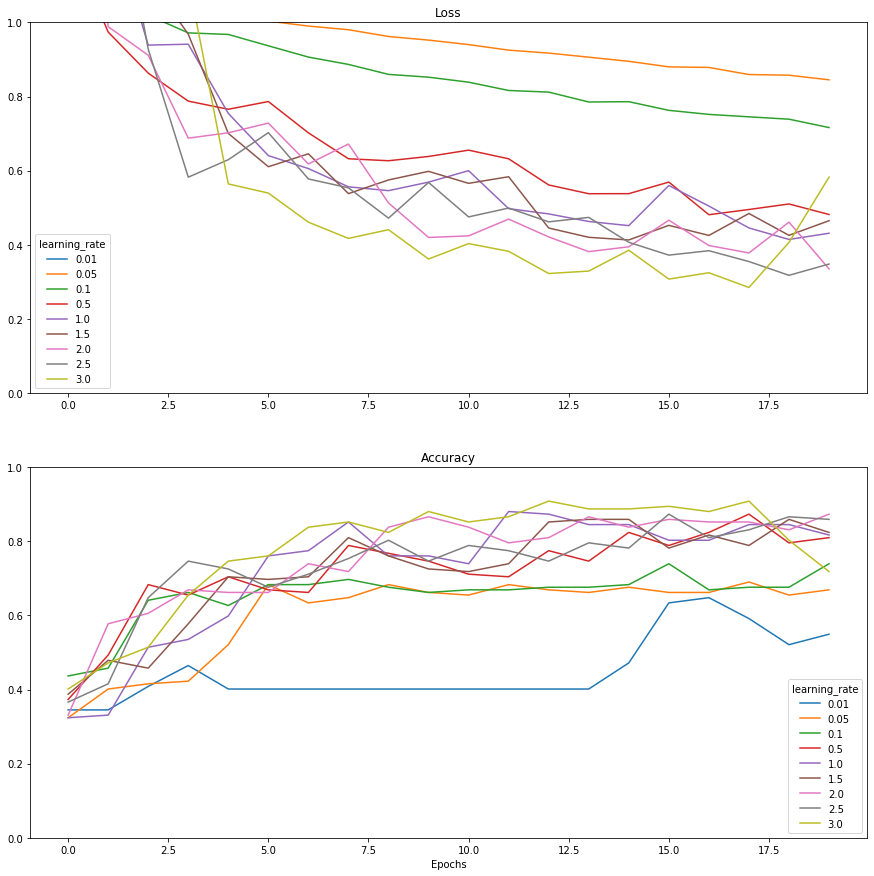

In [160]:
from matplotlib.pyplot import figure
figure(figsize=(15,15))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.show()

The best learning rate is 2 due to its tendency in the loss reduction and higher accuracy.

#### Batch size optimization

In [165]:
import keras.backend as K

batch_sizes = [16, 32, 64, 128]

df_b = []

for batch_size in batch_sizes:
    
    K.clear_session()
   
    model = Sequential()
    model.add(Dense(3, input_shape=(n_features,), activation = 'softmax'))  
    model.compile(Adam(lr=2), loss='categorical_crossentropy', metrics = ['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose = 0, epochs=20)
    df_b.append(pd.DataFrame(h.history, index = h.epoch))

historydf = pd.concat(df_b, axis = 1)

In [171]:
metrics = df_b[0].columns
idx = pd.MultiIndex.from_product([batch_sizes,metrics], names = ['batch_size','metric'])
historydf.columns = idx

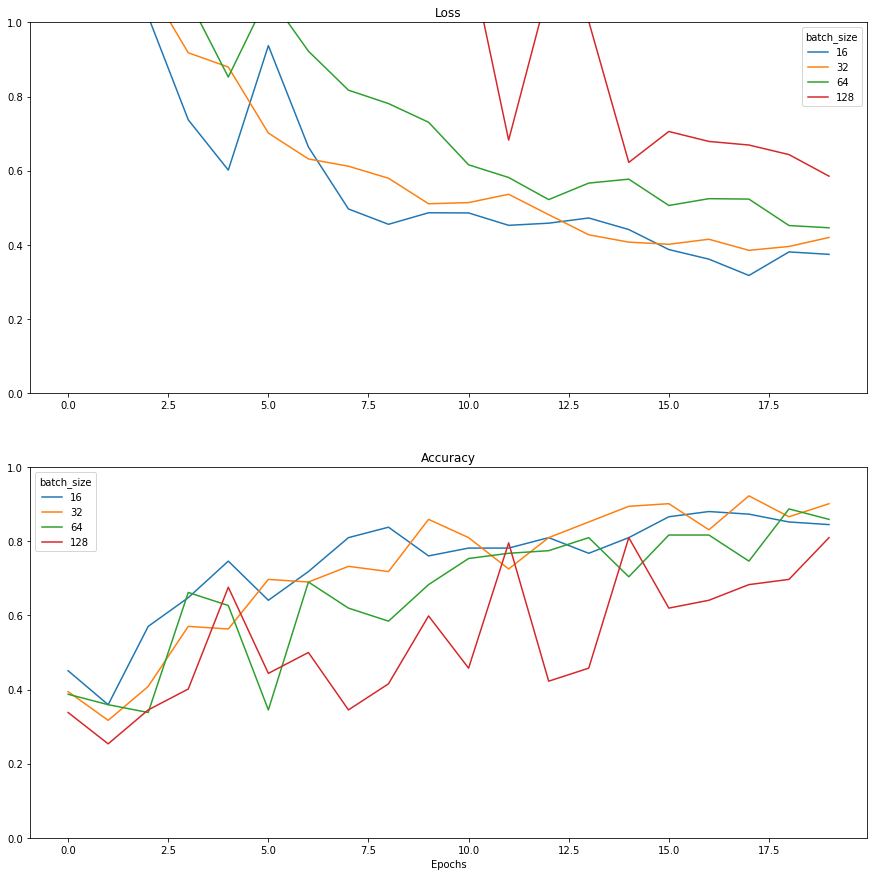

In [172]:
from matplotlib.pyplot import figure
figure(figsize=(15,15))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.show()

Its seems that a small batch size is better, so we'll stick to the 16 batch_size.

#### Best optimizer

In [183]:
import keras.backend as K
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

optimizers = ['SGD(lr=2)',
             'SGD(lr=2, momentum = 0.3)',
             'SGD(lr=2, momentum = 0.3, nesterov=True)',
             'Adam(lr=2)',
             'Adagrad(lr=2)',
             'RMSprop(lr=2)']


df_b = []

for opt in optimizers:
    
    K.clear_session()
   
    model = Sequential()
    model.add(Dense(3, input_shape=(n_features,), activation = 'softmax'))  
    model.compile(optimizer=eval(opt), loss='categorical_crossentropy', metrics = ['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose = 0, epochs=30)
    df_b.append(pd.DataFrame(h.history, index = h.epoch))

historydf = pd.concat(df_b, axis = 1)

In [184]:
metrics = df_b[0].columns
idx = pd.MultiIndex.from_product([optimizers,metrics], names = ['optimizers','metric'])
historydf.columns = idx

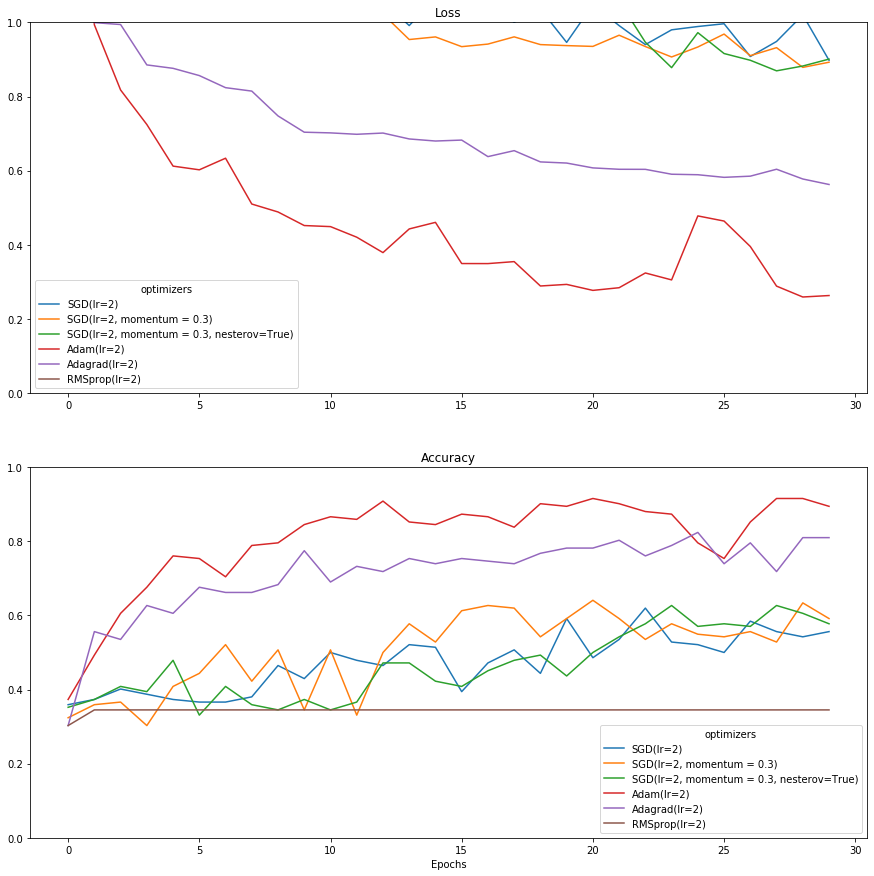

In [185]:
from matplotlib.pyplot import figure
figure(figsize=(15,15))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Loss')

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.show()

Adam optimizer look like the best one. So let's apply all this hyperparameters to our model.

#### Final model 

In [186]:
K.clear_session()

n_features = len(df.columns)-1
model = Sequential()
model.add(Dense(3, input_shape=(n_features,), activation = 'softmax'))  
model.compile(Adam(lr=2), loss='categorical_crossentropy', metrics = ['accuracy'])

In [187]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Train model

In [188]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=16, epochs=100, verbose=1)

Train on 142 samples, validate on 36 samples
Epoch 1/100
142/142 [==============================] - 0s 852us/step - loss: 1.8552 - accuracy: 0.3803 - val_loss: 1.8371 - val_accuracy: 0.3889
Epoch 2/100
142/142 [==============================] - 0s 63us/step - loss: 1.0789 - accuracy: 0.5352 - val_loss: 1.1346 - val_accuracy: 0.6111
Epoch 3/100
142/142 [==============================] - 0s 62us/step - loss: 0.8077 - accuracy: 0.6620 - val_loss: 0.8438 - val_accuracy: 0.6389
Epoch 4/100
142/142 [==============================] - 0s 63us/step - loss: 0.7142 - accuracy: 0.6620 - val_loss: 0.7503 - val_accuracy: 0.5000
Epoch 5/100
142/142 [==============================] - 0s 63us/step - loss: 0.5430 - accuracy: 0.7394 - val_loss: 0.7388 - val_accuracy: 0.5000
Epoch 6/100
142/142 [==============================] - 0s 70us/step - loss: 0.5634 - accuracy: 0.7394 - val_loss: 1.0859 - val_accuracy: 0.5000
Epoch 7/100
142/142 [==============================] - 0s 56us/step - loss: 0.7079 - accur

In [190]:
y_train_pred =  model.predict(X_train)
y_test_pred =  model.predict(X_test)

from sklearn.metrics import classification_report
y_test_pred= (y_test_pred> 0.5) 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.82      0.64      0.72        14
           2       0.91      0.83      0.87        12

   micro avg       0.83      0.81      0.82        36
   macro avg       0.83      0.83      0.82        36
weighted avg       0.83      0.81      0.81        36
 samples avg       0.81      0.81      0.81        36

